# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_q3.csv to train_q3.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test_q3.csv to test_q3.csv


In [4]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1` <br>
Step - 1 :- We take the random values of the weights and bias and try to compute for the better values using the training input and output data. <br>
Step - 2 :- The best possible learning rate is calculated by trying multiple values and finding the Mean Square Error. The leaning rate with the least error is considered.

In [5]:
# Analyzing Data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [6]:
x_train.shape

(240, 25)

In [7]:
def fit(x,y, iterations = 1000, lr = 0.01):
  samples_count, features_count = x.shape
  bias = 0
  weights = np.zeros(features_count)
  
  for i in range(iterations):
    y_pred = np.matmul(x, weights)

    dw = (1 / samples_count) * np.matmul(x.T, (y_pred - y))
    db = (1 / samples_count) * np.sum(y_pred - y)

    weights -= lr*dw
    bias -= lr*db
  return weights, bias


In [8]:
def predict(x, weights, bias):
  y_pred = np.matmul(x, weights) + bias
  return y_pred

In [9]:
def mse(y, y_pred):
  return np.mean((y-y_pred)**2)

In [10]:
# 1.3.1.2
# implement Linear Regression
weights, bias = fit(x_train, y_train)
y_pred = predict(x_test, weights, bias)
mse(y_test, y_pred)

29.086565631010096

In [11]:
# 1.3.2.3
# try with different learning rates and choose the best one
mse_lis = []
learning_rates = [0.004513,0.004533,0.004543,0.00455,0.004559,0.0045599]
for lr in learning_rates:
  weights, bias = fit(x_train, y_train, lr = lr)
  y_pred = predict(x_test, weights, bias)
  mse_lis.append(mse(y_test, y_pred))

In [12]:
mse_lis

[0.022233803813454706,
 0.02231642702009703,
 0.022711070626148924,
 0.02312728883777154,
 0.023831639885687424,
 0.023912538658538148]

In [13]:
weights, bias = fit(x_train, y_train, lr = 0.004513)
y_pred = predict(x_test, weights, bias)
mse(y_test, y_pred)

0.022233803813454706

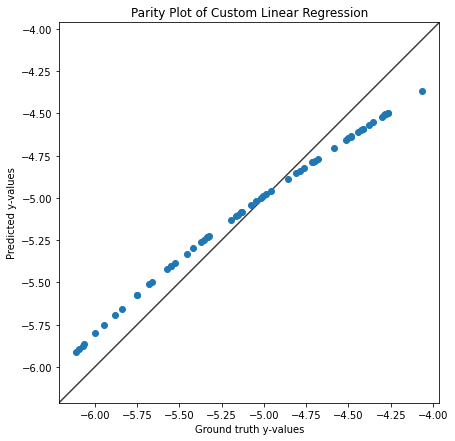

In [14]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer` <br>
Ridge Regression or L2 Regularization:- It mainly involves imposing penalty on application of too many coefficients for fitting the data.It is mainly used to avoid Overfitting of data.

In [15]:
def root_mean_sq_err(y_test, y_pred1):
    return np.sqrt(np.sum((y_test-y_pred1)**2))/len(y_test)

In [16]:
alpha_lis = [0.10,0.15,0.2,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.7,0.8,0.9,1,2,3]

In [17]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression
error = []
for alpha in alpha_lis:
    model = sklearn.linear_model.Ridge(alpha = alpha)
    model.fit(x_train,y_train)
    y_pred_ridge = model.predict(x_test)
    error.append(root_mean_sq_err(y_test, y_pred_ridge))
ridge_df = pd.DataFrame(list(zip(alpha_lis, error)), columns=['Alpha', 'Root_Mean_Squared_Error'])
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

In [18]:
ridge_df

,Alpha,Root_Mean_Squared_Error
0,0.10,0.014117
1,0.15,0.010165
2,0.20,0.008668
3,0.25,0.008102
4,0.30,0.007877
5,0.35,0.007785
6,0.40,0.007757
7,0.45,0.007768
8,0.50,0.007810
9,0.55,0.007880


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`
The parameter alpha is used to control how much we want datapoints to affect our weights, too much means that we could run into the problem of overfitting and too little could mean too much in general error. Therefore, we use alpha to emphasise dominant features and reduce the effect of non dominant features. When we increase the alpha the complexity of model reduce but we need to be careful while taking the value of alpha because higher value of alpha can cause underfitting.

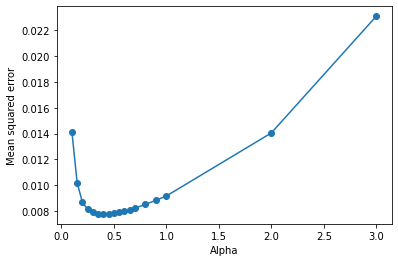

In [19]:
# 1.3.2.4
plt.plot(alpha_lis, error,marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean squared error")
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

In [20]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
error = []
for alpha in alpha_lis:
    model = sklearn.linear_model.Lasso(alpha = alpha)
    model.fit(x_train,y_train)
    y_pred_lasso = model.predict(x_test)
    error.append(root_mean_sq_err(y_test, y_pred_lasso))
lasso_df = pd.DataFrame(list(zip(alpha_lis, error)), columns=['Alpha', 'Root_Mean_Squared_Error'])

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`
The parameter alpha is used to control how much we want datapoints to affect our weights, too much means that we could run into the problem of overfitting and too little could mean too much in general error. Therefore, we use alpha to emphasise dominant features and reduce the effect of non dominant features. When we increase the alpha the complexity of model reduce but we need to be careful while taking the value of alpha because higher value of alpha can cause underfitting.

In [21]:
lasso_df

,Alpha,Root_Mean_Squared_Error
0,0.10,0.053495
1,0.15,0.081036
2,0.20,0.108643
3,0.25,0.136277
4,0.30,0.163924
5,0.35,0.191578
6,0.40,0.219236
7,0.45,0.246898
8,0.50,0.274562
9,0.55,0.302227


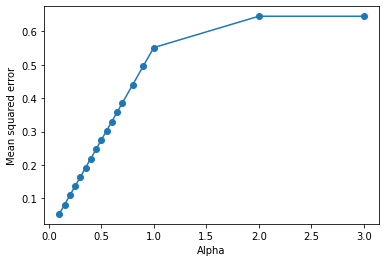

In [22]:
# 1.3.3.4
plt.plot(alpha_lis, error,marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean squared error")
plt.show()